In [1]:
import os
from goodclips.deepsort_types import DeepsortOutput
from goodclips.utils import parse_deepsort_output,create_movement_by_frame
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

deepsort_dir = '../ungitable/deepsort'

def load_deepsort_output(clip_id: str, deepsort_dir: str) -> DeepsortOutput:
    file_path = os.path.join(deepsort_dir, f"{clip_id}.mp4.deepsort.json")
    if os.path.isfile(file_path):
        return parse_deepsort_output(file_path)
    else:
        raise FileNotFoundError(f"No deepsort output file found for clip ID: {clip_id}")

def create_movement_timeseries(deepsort_output: DeepsortOutput) -> pd.DataFrame:
    mv = create_movement_by_frame(deepsort_output)
    mv_df = pd.DataFrame(mv)
    mv_df['ts'] = pd.to_datetime(mv_df['ts'], unit='s')

    # Set the 'ts' column as the index and convert it to a datetime index
    mv_df.set_index('ts', inplace=True)

    # Resample the dataframe into 500ms intervals and calculate the mean movement for each interval
    mv_df_resampled = mv_df.resample('1000ms').sum()

    mv_df.reset_index(inplace=True)

    # Reset the index to get 'ts' back as a column
    mv_df_resampled.reset_index(inplace=True)
    return mv_df_resampled

def plot_movement_timeseries(mv_df_resampled: pd.DataFrame) -> None:
    # Plot the resampled dataframe as a time series
    plt.figure(figsize=(12, 3))
    plt.plot(mv_df_resampled['ts'], mv_df_resampled['movement'], marker='o', linestyle='-')
    plt.title(f'Movement Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Movement')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_movement(clip_id: str, deepsort_dir: str) -> None:
    deepsort_output = load_deepsort_output(clip_id, deepsort_dir)
    mv_by_frame = create_movement_timeseries(deepsort_output)
    plot_movement_timeseries(mv_by_frame)


/tmp/ipykernel_1960825/4022383771.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


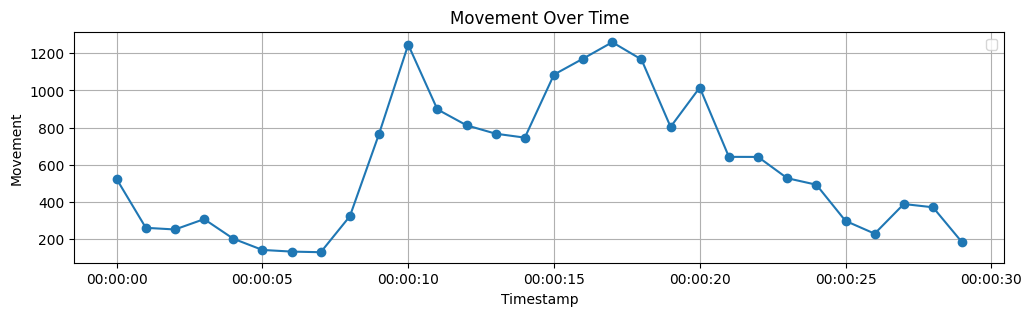

In [3]:
plot_movement('7Rw7hZTxXY75yX3b', deepsort_dir) 